In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [41]:
# Load the dataset
df = pd.read_csv('ETH-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

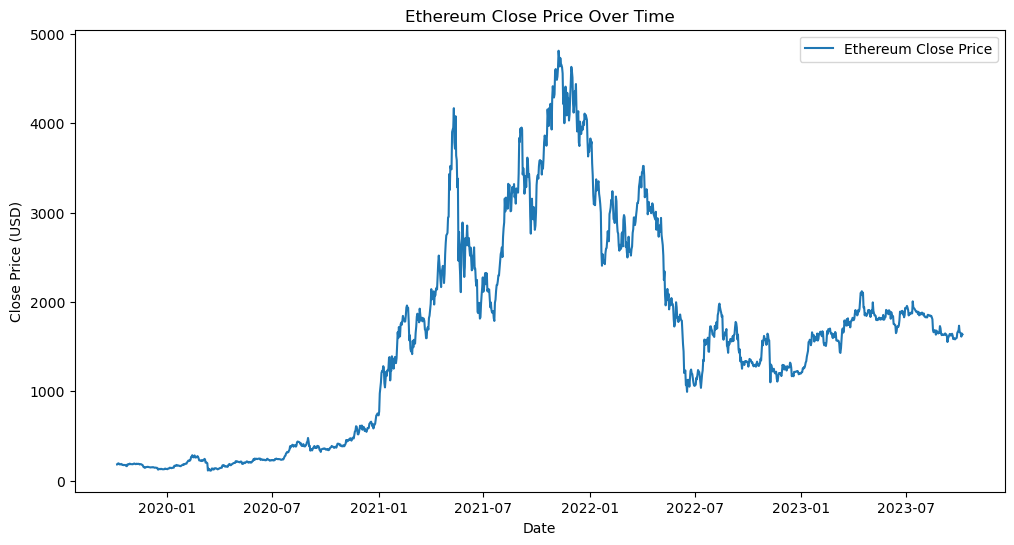

In [42]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Ethereum Close Price')
plt.title('Ethereum Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [43]:
# Select relevant columns for modeling
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df = df[features]

In [44]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


In [45]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)


In [46]:
# # Function to calculate Mean Absolute Percentage Error (MAPE)
# def calculate_mape(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [47]:
# ARIMA model
model_arima = ARIMA(train['Close'], order=(5, 1, 0))
fit_arima = model_arima.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [48]:
# Make predictions on the test set
predictions_arima = fit_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [49]:
# Evaluate ARIMA model
mse_arima = mean_squared_error(test['Close'], predictions_arima)
mape_arima = calculate_mape(test['Close'], predictions_arima)
print(f'ARIMA Model - Mean Squared Error: {mse_arima}, MAPE: {mape_arima}%')


ARIMA Model - Mean Squared Error: 310829.1906181185, MAPE: 29.53726789376352%


In [50]:
# Ensure that X_train and X_test have the correct shape
X_train = np.reshape(train_scaled, (train_scaled.shape[0], 1, len(features)))
X_test = np.reshape(test_scaled, (test_scaled.shape[0], 1, len(features)))


In [51]:
# LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(1, len(features))))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [52]:
# # Reshape data for LSTM
# X_train = np.reshape(train_scaled, (train_scaled.shape[0], 1, len(features)))
# X_test = np.reshape(test_scaled, (test_scaled.shape[0], 1, len(features)))

In [53]:
# Create and train the LSTM model
model_lstm = create_lstm_model()
model_lstm.fit(X_train, train_scaled[:, 3], epochs=50, batch_size=1, verbose=2)

Epoch 1/50
1169/1169 - 4s - loss: 0.0079 - 4s/epoch - 3ms/step
Epoch 2/50
1169/1169 - 3s - loss: 1.3355e-04 - 3s/epoch - 2ms/step
Epoch 3/50
1169/1169 - 3s - loss: 1.1099e-04 - 3s/epoch - 2ms/step
Epoch 4/50
1169/1169 - 2s - loss: 1.0347e-04 - 2s/epoch - 2ms/step
Epoch 5/50
1169/1169 - 3s - loss: 8.9156e-05 - 3s/epoch - 2ms/step
Epoch 6/50
1169/1169 - 3s - loss: 1.0041e-04 - 3s/epoch - 2ms/step
Epoch 7/50
1169/1169 - 3s - loss: 7.0959e-05 - 3s/epoch - 2ms/step
Epoch 8/50
1169/1169 - 3s - loss: 5.1734e-05 - 3s/epoch - 2ms/step
Epoch 9/50
1169/1169 - 2s - loss: 3.5092e-05 - 2s/epoch - 2ms/step
Epoch 10/50
1169/1169 - 2s - loss: 3.4615e-05 - 2s/epoch - 2ms/step
Epoch 11/50
1169/1169 - 2s - loss: 3.0983e-05 - 2s/epoch - 2ms/step
Epoch 12/50
1169/1169 - 3s - loss: 1.9230e-05 - 3s/epoch - 2ms/step
Epoch 13/50
1169/1169 - 3s - loss: 2.1231e-05 - 3s/epoch - 2ms/step
Epoch 14/50
1169/1169 - 2s - loss: 2.5888e-05 - 2s/epoch - 2ms/step
Epoch 15/50
1169/1169 - 2s - loss: 1.5194e-05 - 2s/epoch - 2m

In [61]:
# Reshape predictions to match the original number of features
predictions_lstm_scaled_reshaped = np.reshape(predictions_lstm_scaled, (predictions_lstm_scaled.shape[0], len(features)))
predictions_lstm = scaler.inverse_transform(predictions_lstm_scaled_reshaped)


ValueError: cannot reshape array of size 293 into shape (293,6)

In [60]:
# # Reshape predictions to match the original number of features
# predictions_lstm_scaled_reshaped = np.reshape(predictions_lstm_scaled, (predictions_lstm_scaled.shape[0], len(features)))


ValueError: cannot reshape array of size 293 into shape (293,6)

In [59]:
predictions_lstm = scaler.inverse_transform(predictions_lstm_scaled_reshaped)[:, 0, :]


ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
# Evaluate LSTM model
mse_lstm = mean_squared_error(test['Close'], predictions_lstm)
mape_lstm = calculate_mape(test['Close'], predictions_lstm)
print(f'LSTM Model - Mean Squared Error: {mse_lstm}, MAPE: {mape_lstm}%')


In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual Close Prices')
plt.plot(test.index, predictions_arima, label='ARIMA Predictions')
plt.plot(test.index, predictions_lstm[:, 3], label='LSTM Predictions')  # Assuming you want to plot the 'Close' predictions
plt.title('Ethereum Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()